<a href="https://colab.research.google.com/github/leejuny0ng/AI/blob/main/%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

키워드 분석
- 핵심어 => 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
- 핵심어 분석 => 형태소의 등장 빈도를 분석함으로써 핵심어 추출
- 불용어를 제외한 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초


한글 font 설정
- 실행 후 런타임 재시작 필요

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
fm.fontManager.addfont(fontpath)

<ipython-input-63-a4a04386e831>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


네이버 영화 리뷰 데이터
- https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [26]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [55]:
#raw = [x.decode() for x in raw[1:]]
raw = raw[1:]
reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화', '완전 감동입니다 다시봐도 감동', '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음', '굿', '바보가 아니라 병 쉰 인듯']


형태소 분석을 이용한 명사 추출
- 형태소 분석기 Mecab으로 명사만 추출

In [20]:
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [21]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'Install mecab-ko-dic'
Install mecab-ko-dic
+ install_mecab_ko_dic
+ echo 'Install mecab-ko-dic'
Install mecab-ko-dic
+ cd /tmp
+ curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 47.4M  100 4

In [38]:
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8
!apt-get install -y mecab-ko mecab-ko-dic


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package mecab-ko
E: Unable to locate package mecab-ko-dic


In [51]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-09-23 08:08:03--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-09-23 08:08:03--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc062a3b72f9a094c8d6098669ed.dl.dropboxusercontent.com/cd/0/inline/CbGvtDoFYaSpoGjuuTUNddZF_fENZGTIafvwygYDDRrlHmn44zNjXCK-K3Y1p2k_3hJoDLLFqpB7dA8NjM0CIPEMXhju0w7DfawJGrhAPIKeCW0Z9khF03pgld9jIHAva6D30VeAMJIbfbTUDtVhGes-/file?dl=1# [following]
--2024-09-23 08:08:04--  https://uc0

In [56]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []

for review in reviews:
  for noun in tagger.nouns(review): # reviews로부터 명사를 하나씩 읽어와서 nouns에 append 함
    nouns.append(noun)

print(nouns[:10])

['사랑', '사람', '처음', '끝', '수', '영화', '감동', '감동', '개', '전쟁']


불용어 사전
- 한국어는 명사에도 많은 불필요 단어들이 포함
- 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거가 필요함
- 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요

In [57]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


불용어를 제외하여 형태소 분석 수행
- 한글 텍스트에 대해서 형태소 분석 수행
- 분석으로 추출하는 명사중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [58]:
nouns = []

for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

print(nouns[:10])

['사랑', '사람', '처음', '감동', '감동', '전쟁', '빠', '굿', '바보', '병']


단어 빈도수 측정
- 단어 빈도수 측정에는 collections 라이브러리의 Counter 함수 이용
- collections 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
- counter를 이용하면 각 단어와 각 단어의 빈도수를 딕셔너리로 편리하게 생성 가능

In [59]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50)) # most_common은 가장 많이 나온 것을 반환 (여기서는 dict type)
print(top_nouns)

{'연기': 9173, '최고': 8810, '평점': 8513, '스토리': 7164, '생각': 6918, '드라마': 6889, '사람': 6740, '감동': 6489, '배우': 5877, '내용': 5731, '감독': 5628, '재미': 5476, '시간': 5324, '년': 4934, '사랑': 4742, '쓰레기': 4584, '작품': 3982, '하나': 3877, '정도': 3659, '마지막': 3647, '이건': 3595, '액션': 3568, '기대': 3477, '장면': 3262, '편': 3044, '이게': 3020, '최악': 3017, '돈': 2981, '이야기': 2947, '애': 2717, '명작': 2685, '처음': 2684, '여자': 2677, '이해': 2671, '이상': 2643, '한국': 2633, '주인공': 2554, '우리': 2531, '연출': 2376, '때문': 2371, '기억': 2364, '현실': 2191, '마음': 2128, '굿': 2110, '남자': 2078, '결말': 2066, '인생': 2056, '공포': 2046, '전개': 2035, '짜증': 2011}


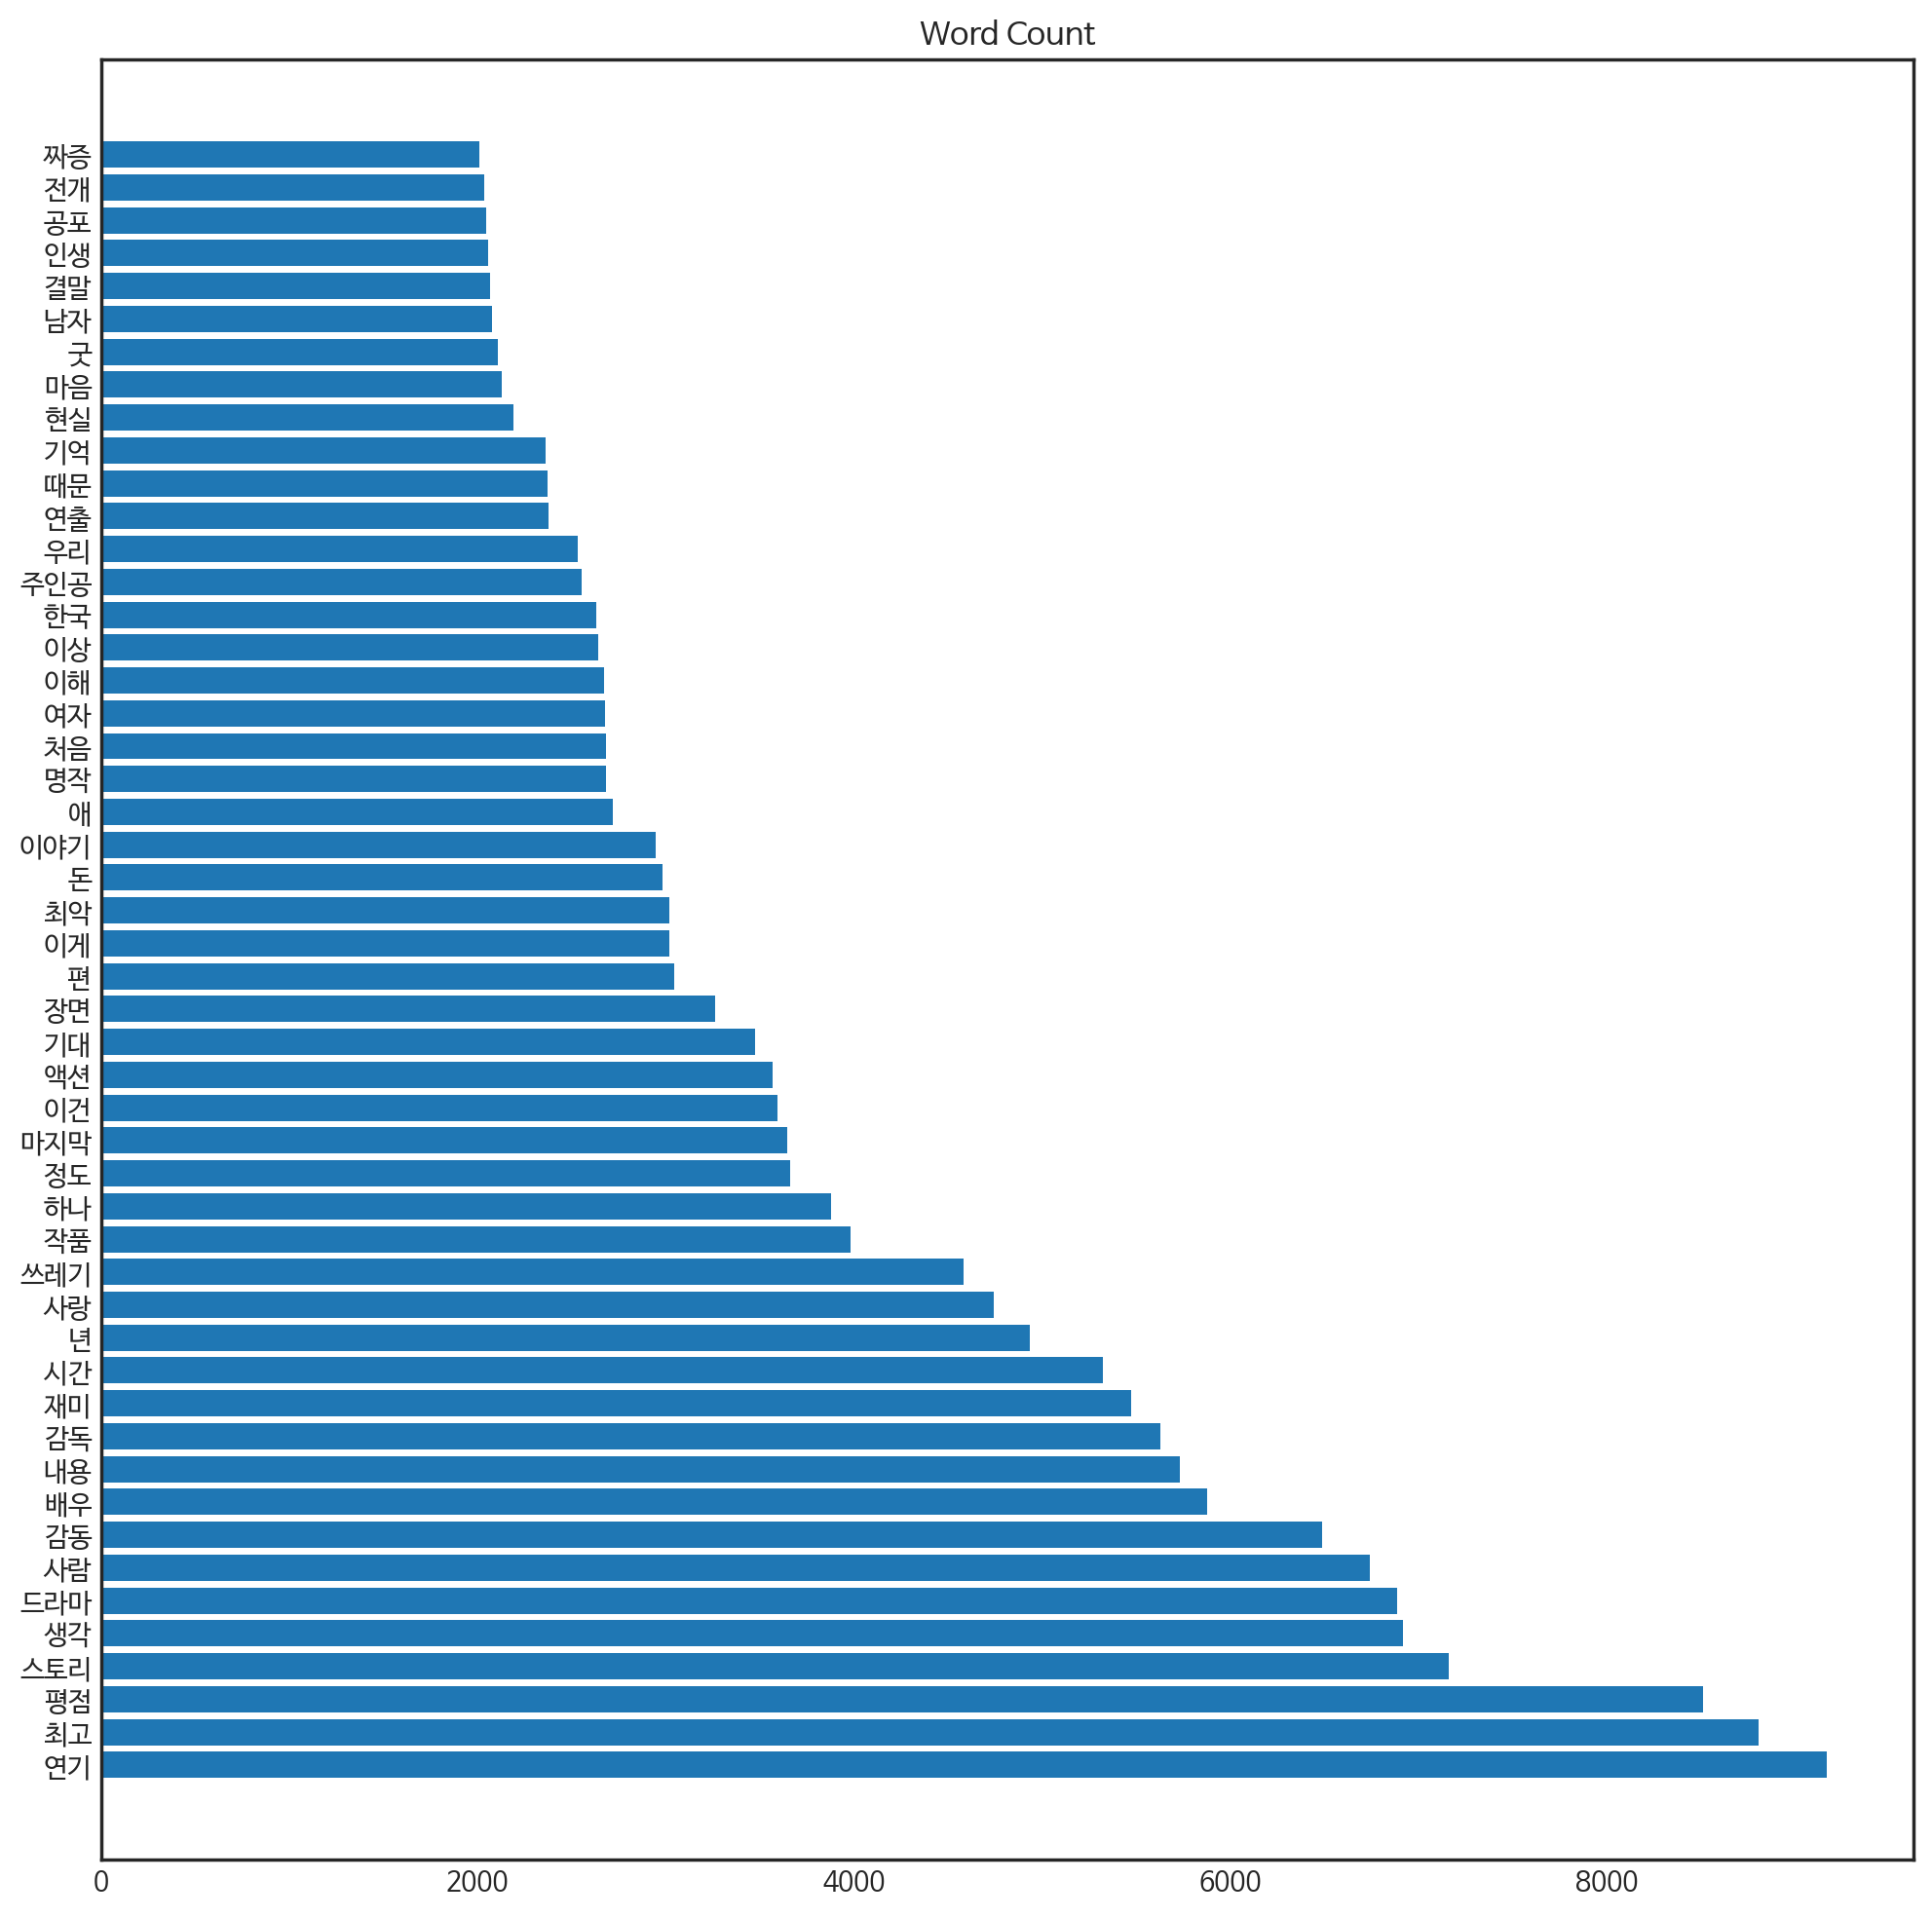

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

y_pos = np.arange(len(top_nouns))

figure = plt.figure(figsize = (12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

In [45]:
!pip install wordcloud

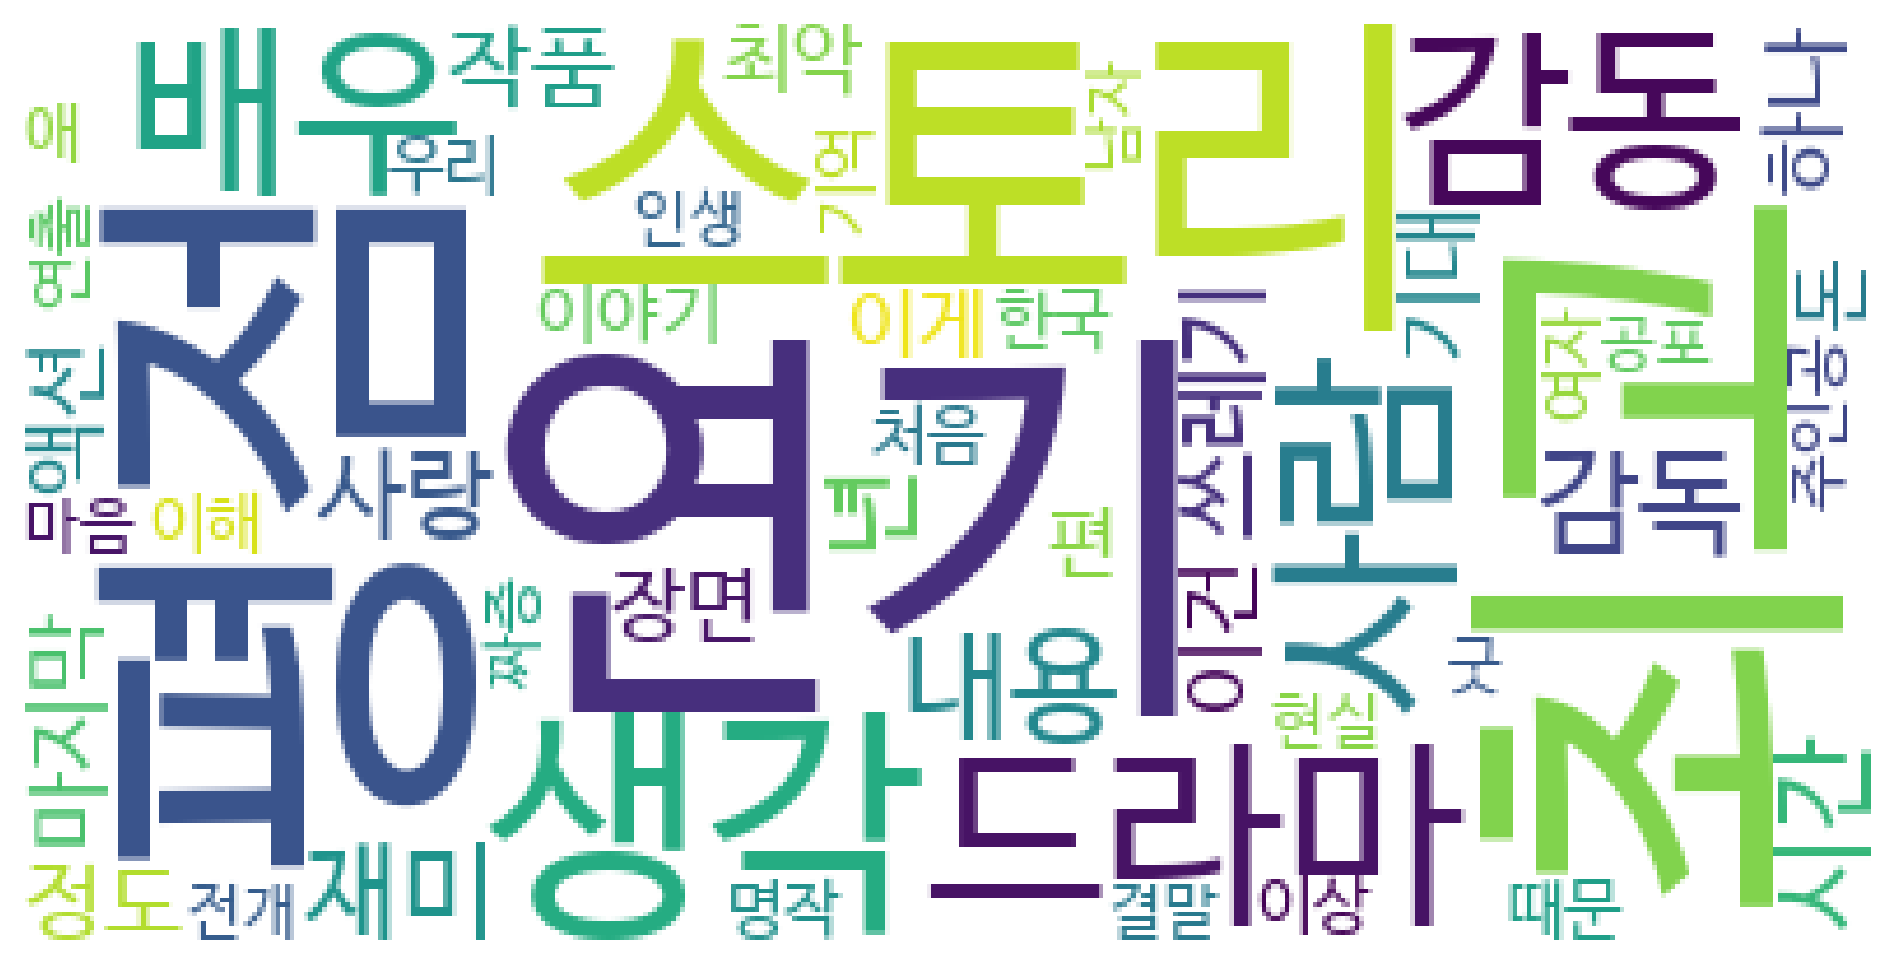

In [61]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)
# 워드 클라우드를 시각화할때는 이미지 시각화 함수인 imshow()함수를 사용해야 함

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.imshow(wc)
ax.axis('off')
plt.show()

squarify 트리맵 시각화
- squarify 는 트리맵 생성을 지원해주는 파이썬 라이브러리
- squarify 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄

In [62]:
!pip install squarify

<Axes: >

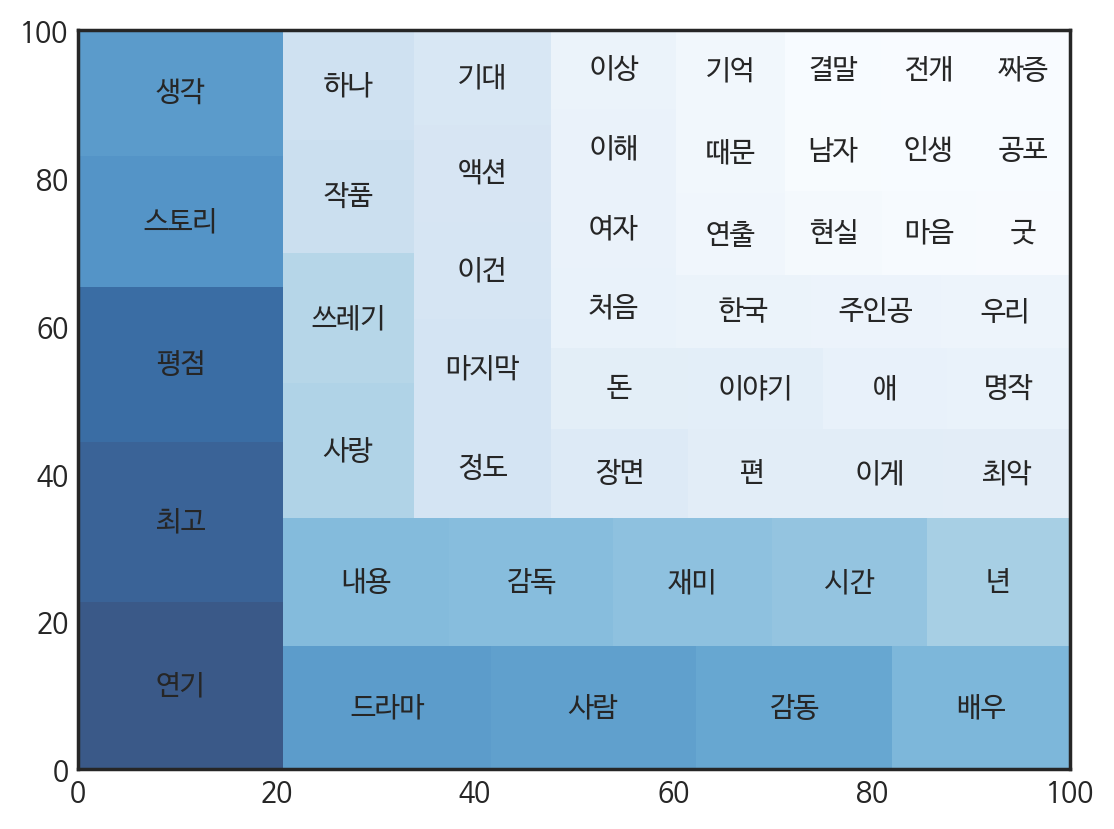

In [69]:
import squarify

norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                               vmax = max(top_nouns.values()))
# 출력하기 전 정규화 과정, vmin값에 top nouns의 min value값을 넣어주고 vmax 값에 topnouns의 max value값 넣어줌

colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]
# colors는 파란색으로

#키워드가 얼마나 중요한지 구분이 되어서 출력이 될 것

squarify.plot(label = top_nouns.keys(), # keys 순서대로
              sizes = top_nouns.values(),
              color = colors,
              alpha = 0.8)
# 중요도 높은 순서대로 keys, values이 결정되고
# (alpha값을(0~1 사이의 값을, 연함 0 < alpha < 1 진함) 기준으로) 색깔의 농도가 결정됨
